Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.  Determine the number of clusters using the elbow method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [30]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [31]:
df.dropna(axis = 0, inplace = True)

In [32]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [33]:
x = df.iloc[:,[1,3]].values
x

array([[37,  1],
       [20, 13],
       [21,  9],
       [30,  1],
       [24,  4],
       [29,  3],
       [47,  4],
       [26,  8],
       [46,  2],
       [49,  3],
       [32,  2],
       [27,  2],
       [35,  4],
       [37,  7],
       [30,  2],
       [28,  6],
       [29,  3],
       [49,  8],
       [39,  9],
       [35, 13],
       [36,  3],
       [43,  8],
       [42,  5],
       [27,  1],
       [29, 10],
       [23, 13],
       [40,  2],
       [32,  1],
       [31,  7],
       [35,  2],
       [49,  6],
       [21,  7],
       [42,  3],
       [47,  9],
       [37,  5],
       [55,  1],
       [25, 12],
       [22,  3],
       [36,  4],
       [22,  5],
       [45,  2],
       [50,  8],
       [22,  7],
       [44,  5],
       [29,  8],
       [47,  9],
       [46,  4],
       [28,  5],
       [34,  2],
       [41,  8],
       [21,  6],
       [27, 10],
       [46,  1],
       [31, 10],
       [48,  9],
       [32,  6],
       [20,  3],
       [34, 10],
       [20,  2

In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

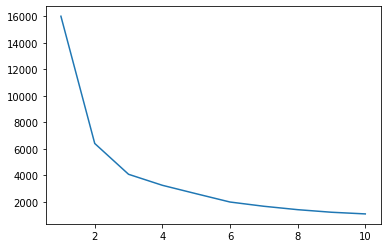

In [35]:
plt.plot(range(1,11),wcss)

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

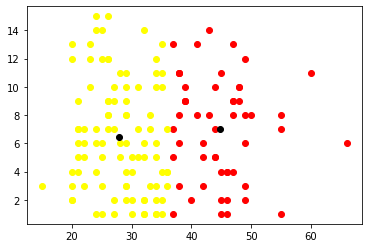

In [38]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],c='red')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],c='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')